# Домашнє завдання: Побудова класифікатора сентименту на основі набору даних Tweet Sentiment Extraction

**Мета:** Провести аналіз набору даних, виконати векторизацію текстових даних за допомогою методів bag-of-words та TF-IDF, порівняти їх, побудувати класифікатор та провести аналіз помилок.

**Набір даних:**
Дані беремо з цього змагання на Kaggle: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

Оригінальне змагання має дещо іншу задачу, але ми будемо поки будувати саме класифікатор.

### Завдання 1. Завантаження та ознайомлення з набором даних

- Завантажте набір даних `train.csv` з посилання та ознайомтеся з його структурою.
- Виведіть перші 5 рядків та основну статистику: кількість записів, типи колонок, кількість пропущених значень.
- Видаліть записи, в яких є пропущені значення.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
train_frame = '/content/drive/MyDrive/ML_course/data/tweet_sentiment_train.csv.zip'
raw_df = pd.read_csv(train_frame)

In [ ]:
raw_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
raw_df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


In [ ]:
null_data = raw_df[raw_df['text'].isnull()]
null_data

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [ ]:
raw_df = raw_df.drop(index=314)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


### Завдання 2. Exploratory Data Analysis

- Проведіть аналіз кількості класів та розподілу міток. Класи знаходяться в колонці `sentiment`.
- Візуалізуйте розподіл довжин текстів в символах та зробіть висновок про довжини постів: якої довжини постів найбільше, що бачите з розподілу?



In [ ]:
raw_df.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [ ]:
import plotly
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='count'>

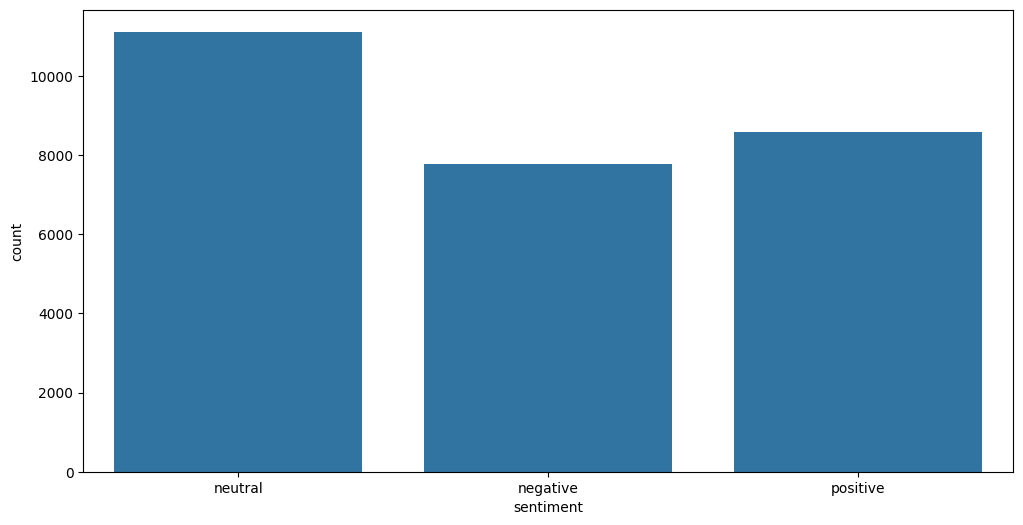

In [ ]:
#Групування даних та розподіл класів по колонці sentiment
dist = raw_df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
dist.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=raw_df)

In [ ]:
raw_df_symbol_distr = raw_df.copy()

In [ ]:
raw_df_symbol_distr['text_length'] = raw_df_symbol_distr['text'].apply(len)

In [ ]:
raw_df_symbol_distr

,textID,text,selected_text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,122
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,27


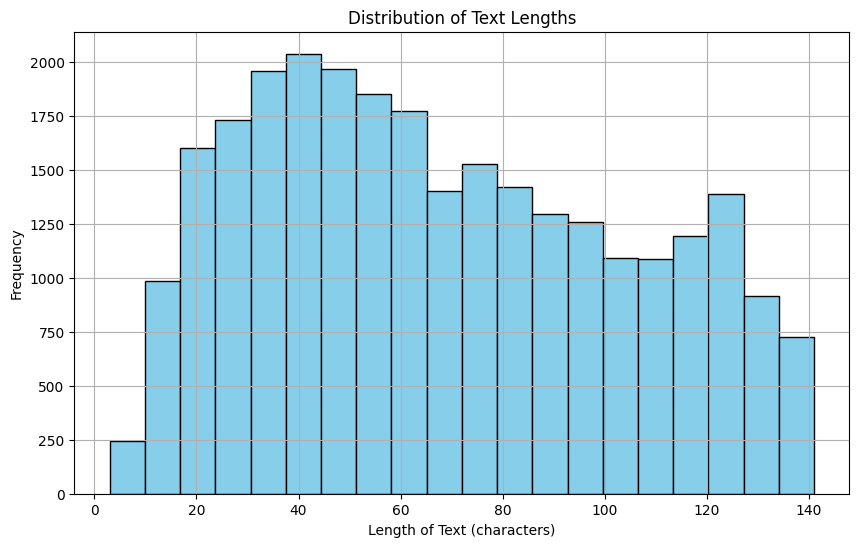

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(raw_df_symbol_distr['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Найбільше постів із довжиною 40. На візуалізації видно розподіл схожий на Гаусівський зі зміщенням вліво та зі стрибком справа(у стороні збільшення кількості символів)

### Завдання 3. Попередня обробка текстових даних та векторизація з bag of words


Наша задача тут отримати вектори методом bag of words колонки `text`, виконавши попередню обробку тексту.
Попередня обробка має включати
- видалення stopwords необхідної мови
- токенізація (розбиття текстів на фрагменти по 1 слову)
- стеммінг слів зі `SnowballStemmer`.
- самостійно задайте кількість слів в словнику для `sklearn.feature_extraction.text.CountVectorizer`. Можливо для цього доведеться виконати додатковий аналіз.

Ви також можете додати сюди додаткові методи очистки текстів, наприклад, видалення деяких символів чи груп символів, якщо в процесі роботи побачите, що хочете щось видалити.

Напишіть код аби виконати це завдання. Перед цим рекомендую детально ознайомитись з тим, що робить обʼєкт `sklearn.feature_extraction.text.CountVectorizer` за замовченням.

Це завдання можна виконати двома способами - один - максимально подібно до того, як ми це робили в лекції, другий - дещо інакше перегрупувавши етапи обробки тексту.




In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
raw_df_tok = raw_df.copy()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
def preprocess_text(text):

    #токенізація тексту
    tokens = word_tokenize(text)

    #Видалення стоп-слів
    filtered_tokens = [word for word in tokens if word.lower() not in english_stopwords]

    # Стемінг слів
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(stemmed_tokens)

In [ ]:
raw_df_tok['processed_text'] = raw_df_tok['text'].apply(preprocess_text)

In [ ]:
raw_df_tok

,textID,text,selected_text,sentiment,processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"` respond , go"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego ! ! !
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bulli ...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview ! leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"son * * * * , ` put releas alreadi bought"
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lost job ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,"` wonder rake . client made clear .net , ` for..."
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good . enjoy break - probabl need hectic w...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth * * * * .


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Створення CountVectorizer
vectorizer = CountVectorizer()

#Отримання векторів
X = vectorizer.fit_transform(raw_df_tok['processed_text'])

# Отримання всіх слів та їх частот
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

# Сортування слів за частотністю
word_freq = word_freq.sort_values(by='frequency', ascending=False)

# Виведення 10 найбільш поширених слів
print(word_freq.head(10))

# Виведення 10 найменш поширених слів
print(word_freq.tail(10))

        word  frequency
6269     day       2449
8946      go       2383
8787     get       1916
8993    good       1599
21096   work       1532
12133   love       1484
11857   like       1460
9058     got       1260
10087   http       1247
19242  today       1155
             word  frequency
1419     _cabrera          1
10114        huhu          1
10115      huhuhu          1
1418      _c_a_s_          1
10118        hulz          1
10119         hum          1
10124       humil          1
10125      humira          1
10126        humm          1
10874  jessicaaaa          1


In [ ]:
print(word_freq.tail(100))

             word  frequency
10073         hre          1
1426      _carrol          1
10075         hru          1
10077        hsbc          1
10078         hse          1
...           ...        ...
10119         hum          1
10124       humil          1
10125      humira          1
10126        humm          1
10874  jessicaaaa          1

[100 rows x 2 columns]


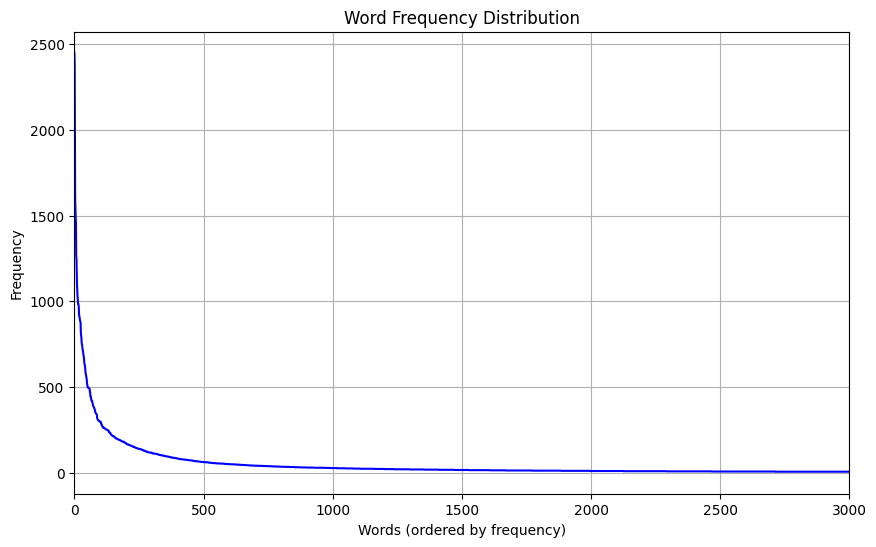

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(word_freq)), word_freq['frequency'], color='blue')
plt.title('Word Frequency Distribution')
plt.xlabel('Words (ordered by frequency)')
plt.ylabel('Frequency')
plt.xlim(0, 3000)  # Обмеження для осі X до 4000
plt.grid(True)
plt.show()

Напевно, потрібно видалити(не враховувати слова з частотою менше 2

In [ ]:
# Відбір слів, які зустрічаються 2 разів або більше
common_words = word_freq[word_freq['frequency'] >= 2]['word'].tolist()

# Перетворення тексту з фільтрацією рідкісних слів
def filter_rare_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word in common_words]
    return ' '.join(filtered_tokens)

# Застосування функції до всього датафрейму
raw_df_tok['filtered_text'] = raw_df_tok['processed_text'].apply(filter_rare_words)

# Перегляд результатів
raw_df_tok

,textID,text,selected_text,sentiment,processed_text,filtered_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"` respond , go",respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego ! ! !,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bulli ...,boss bulli
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview ! leav alon,interview leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"son * * * * , ` put releas alreadi bought",son put releas alreadi bought
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lost job ...,wish could come see denver husband lost job af...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,"` wonder rake . client made clear .net , ` for...",wonder client made clear forc dev learn new la...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good . enjoy break - probabl need hectic w...,yay good enjoy break probabl need hectic weeke...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth * * * * .,worth


In [ ]:
X = vectorizer.fit_transform(raw_df_tok['filtered_text'])
X.shape

(27480, 8286)

In [ ]:
X[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(27480, 8286)

In [ ]:
test_inputs = vectorizer.transform(raw_df_tok.filtered_text)

Виконав таким методом, щоб по частоті відсікти слова. Найчастіше вживані - нормальні слова, найрідше вживані, судячи по print(word_freq.tail(10)) - якісь дурниці.

### Завдання 4. Побудова класифікатора

- Розділіть індекси даних на навчальний та тестовий набори в обраному співвівдношенні. Використовуючи отримані індекси сфомуйте набори для тренування класифікатора `X_train_bow, X_test_bow, y_train, y_test`.
- Навчіть класифікатор (наприклад, Logistic Regression, Decision Tree або один з алгоритмів бустингу) на даних, векторизованих методом bag-of-words. Спробуйте кілька моделей і оберіть найбільш точну :)
- Виведіть інформацію, яка дає можливість оцінити якість класифікації.
- Оцініть якість фінальної класифікації: вона хороша чи не дуже?



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, raw_df_tok.sentiment,
                                                                        test_size=0.3, random_state=42)

In [ ]:
X_train_bow.shape

(19236, 8286)

In [ ]:
X_test_bow.shape

(8244, 8286)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression(solver='sag')

In [ ]:
%%time
model_LR.fit(X_train_bow, y_train)

CPU times: user 1.14 s, sys: 7.79 ms, total: 1.14 s
Wall time: 1.15 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [ ]:
train_preds_LR = model_LR.predict(X_train_bow)

In [ ]:
test_preds_LR = model_LR.predict(X_test_bow)

In [ ]:
train_preds_LR


array(['neutral', 'negative', 'neutral', ..., 'neutral', 'neutral',
       'positive'], dtype=object)

In [ ]:
pd.Series(train_preds_LR).value_counts()

,count
neutral,8491
positive,5818
negative,4927


In [ ]:
pd.Series(test_preds_LR).value_counts()

,count
neutral,3807
positive,2436
negative,2001


In [ ]:
pd.Series(y_train).value_counts()

,count
sentiment,
neutral,7774
positive,6037
negative,5425


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(y_train, train_preds_LR)

0.8510605115408609

In [ ]:
accuracy_score(y_test, test_preds_LR)

0.6789180009704027

In [ ]:
#f1_score(y_train, train_preds_LR)

In [ ]:
f1_macro = f1_score(y_train, train_preds_LR, average='macro')
f1_micro = f1_score(y_train, train_preds_LR, average='micro')
f1_weighted = f1_score(y_train, train_preds_LR, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.8513730557436777
Micro F1-score: 0.8510605115408609
Weighted F1-score: 0.8511368332396755


In [ ]:
f1_macro = f1_score(y_test, test_preds_LR, average='macro')
f1_micro = f1_score(y_test, test_preds_LR, average='micro')
f1_weighted = f1_score(y_test, test_preds_LR, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.6788984945757575
Micro F1-score: 0.6789180009704027
Weighted F1-score: 0.6787185888201727


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DTC = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model_DTC.fit(X_train_bow, y_train)

CPU times: user 6.39 s, sys: 9.74 ms, total: 6.4 s
Wall time: 6.52 s


DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds_DTC = model_DTC.predict(X_train_bow)

In [ ]:
test_preds_DTC = model_DTC.predict(X_test_bow)

In [ ]:
pd.Series(train_preds_DTC).value_counts()

,count
neutral,7810
positive,6001
negative,5425


In [ ]:
accuracy_score(y_train, train_preds_DTC)

0.9945414847161572

In [ ]:
accuracy_score(y_test, test_preds_DTC)

0.6516254245511888

In [ ]:
f1_macro = f1_score(y_train, train_preds_DTC, average='macro')
f1_micro = f1_score(y_train, train_preds_DTC, average='micro')
f1_weighted = f1_score(y_train, train_preds_DTC, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.9946201564379994
Micro F1-score: 0.9945414847161572
Weighted F1-score: 0.9945427405691005


In [ ]:
f1_macro = f1_score(y_test, test_preds_DTC, average='macro')
f1_micro = f1_score(y_test, test_preds_DTC, average='micro')
f1_weighted = f1_score(y_test, test_preds_DTC, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.6519268748328496
Micro F1-score: 0.6516254245511888
Weighted F1-score: 0.6511912754444151


In [ ]:
model_DTC.tree_.max_depth

1433

In [ ]:
model_DTC_d50 = DecisionTreeClassifier(random_state=42, max_depth=50)

In [ ]:
%%time
model_DTC_d50.fit(X_train_bow, y_train)

CPU times: user 1.19 s, sys: 4.06 ms, total: 1.19 s
Wall time: 1.19 s


DecisionTreeClassifier(max_depth=50, random_state=42)

In [ ]:
train_preds_DTC_d50 = model_DTC_d50.predict(X_train_bow)

In [ ]:
test_preds_DTC_d50 = model_DTC_d50.predict(X_test_bow)

In [ ]:
pd.Series(train_preds_DTC_d50).value_counts()

,count
neutral,11327
positive,4935
negative,2974


In [ ]:
accuracy_score(y_train, train_preds_DTC_d50)

0.7694427115824496

In [ ]:
accuracy_score(y_test, test_preds_DTC_d50)

0.6614507520621058

In [ ]:
f1_macro = f1_score(y_train, train_preds_DTC_d50, average='macro')
f1_micro = f1_score(y_train, train_preds_DTC_d50, average='micro')
f1_weighted = f1_score(y_train, train_preds_DTC_d50, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.7619691809110606
Micro F1-score: 0.7694427115824496
Weighted F1-score: 0.765410149387574


In [ ]:
f1_macro = f1_score(y_test, test_preds_DTC_d50, average='macro')
f1_micro = f1_score(y_test, test_preds_DTC_d50, average='micro')
f1_weighted = f1_score(y_test, test_preds_DTC_d50, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.6462947173914521
Micro F1-score: 0.6614507520621058
Weighted F1-score: 0.6525179748655093


DecisionTreeClassifier справився значно краще, напевно, модель перенавчилась.

При глибині дерева 50, методом підбору вийшов accuracy та f1 приблизно як і у логістичній регресії.

### Завдання 5. Аналіз впливовості слів в отриманого класифікатора

- Для обраної вами моделі проведіть аналіз важливості слів (ознак): які слова (токени) найбільше впливають для визначення сентименту? Чи це логічно на ваш погляд, що саме ці символи впливають найбільше/найменще?


In [ ]:
feature_importance = pd.Series(model_LR.coef_[0], index=vectorizer.get_feature_names_out(), name='imp').sort_values(ascending=False)
feature_importance.head(15)

,imp
sad,2.600880
suck,2.471178
bore,2.364544
sorri,2.302350
hate,2.147899
miss,2.124432
fail,2.048750
shame,2.011147
disappoint,2.005836
stupid,1.942010


In [ ]:
feature_importance.tail(15)

,imp
yum,-1.454277
nice,-1.471721
beauti,-1.521434
amaz,-1.547062
great,-1.567439
bless,-1.625289
welcom,-1.629672
smile,-1.649390
enjoy,-1.666322
congrat,-1.810111


In [ ]:
feature_importance_DTC50 = pd.Series(model_DTC_d50.feature_importances_, index=vectorizer.get_feature_names_out(), name='imp').sort_values(ascending=False)
feature_importance_DTC50.head(15)

,imp
happi,0.050805
love,0.049205
thank,0.045880
good,0.036665
miss,0.031139
sad,0.029713
great,0.024946
sorri,0.020831
nice,0.020307
awesom,0.019377


In [ ]:
feature_importance_DTC50.tail(15)

,imp
forcast,0.0
followin,0.0
forc,0.0
forbidden,0.0
footprint,0.0
footi,0.0
footbal,0.0
foot,0.0
foolish,0.0
food,0.0


Логістична регресія, на мою думку, краще відібрала значущі слова. Хоча чесно кажучи, що попередньо мені більше сподобались DecisionTrees.

### Завдання 6. Векторизація текстів з допомогою TF-IDF. Тренування класифікатора, аналіз точності і впливовості слів.

- Проведіть векторизацію текстів з векторизатором TfidfVectorizer. Реалізуйте векторизацію так, аби препроцесинг включав всі ті самі кроки, що і в випадку використання векторизації Bag of Words.

- Натренуйте той самий класифікатор на TF-IDF векторах, виконавши розбивку набору даних на train, test так, аби в трейні були всі ті самі записи, що і були в попередньому завданні (це важливо для порівняння результатів).

- Проаналізуйте якість класифікації вивівши потрібні для цього метрики. Чи стала якість класифікації кращою?

- Які токени найбільше впливають на результат при тренуваннні класифікатора з TF-IDF векторами? Порівняйте з найважливішими токенами при Bag of Words векторизації. Яку векторизацію ви б обрали для фінальної імплементації рішення? Обґрунтуйте свій вибір.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
#Отримання векторів
X_TFIDF = vectorizer.fit_transform(raw_df_tok['filtered_text'])

In [ ]:
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, raw_df_tok.sentiment,
                                                                        test_size=0.3, random_state=42)

In [ ]:
model_LR.fit(X_train_TFIDF, y_train_TFIDF)

LogisticRegression(solver='sag')

In [ ]:
train_preds_LR = model_LR.predict(X_train_TFIDF)
test_preds_LR = model_LR.predict(X_test_TFIDF)

In [ ]:
accuracy_score(y_train_TFIDF, train_preds_LR)

0.7944998960282803

In [ ]:
accuracy_score(y_test_TFIDF, test_preds_LR)

0.6806162057253761

In [ ]:
f1_macro = f1_score(y_train_TFIDF, train_preds_LR, average='macro')
f1_micro = f1_score(y_train_TFIDF, train_preds_LR, average='micro')
f1_weighted = f1_score(y_train_TFIDF, train_preds_LR, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.7947628226425998
Micro F1-score: 0.7944998960282803
Weighted F1-score: 0.7946648020594557


In [ ]:
f1_macro = f1_score(y_test_TFIDF, test_preds_LR, average='macro')
f1_micro = f1_score(y_test_TFIDF, test_preds_LR, average='micro')
f1_weighted = f1_score(y_test_TFIDF, test_preds_LR, average='weighted')

print(f"Macro F1-score: {f1_macro}")
print(f"Micro F1-score: {f1_micro}")
print(f"Weighted F1-score: {f1_weighted}")

Macro F1-score: 0.6785793673129049
Micro F1-score: 0.6806162057253761
Weighted F1-score: 0.6797866540657725


In [ ]:
feature_importance = pd.Series(model_LR.coef_[0], index=vectorizer.get_feature_names_out(), name='imp').sort_values(ascending=False)
feature_importance.head(15)

,imp
sad,5.152632
miss,5.088182
sorri,4.417285
suck,4.390288
hate,4.105913
bore,3.926538
fail,3.440291
stupid,3.369278
sick,3.333747
poor,3.275284


Схожі слова у трохи іншому порядку з векторизатором TF-IDF порівняно з CountVectorizer

Точність на тестових трошки менша, зате більша на тестових, що мені видається кращим результатом загалом.

### Завдання 7. Аналіз помилок класифікації з векторизацією TF-IDF.

- Проаналізуйте, на яких екземплярах помиляється класифікатор при векторизації TF-IDF.
- На основі аналізу запропонуйте 3 шляхи поліпшення якості класифікації.

In [ ]:
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_test_TFIDF, test_preds_LR)) if true != pred]
incorrect_indices

[1,
 8,
 17,
 21,
 25,
 26,
 29,
 34,
 38,
 48,
 49,
 51,
 55,
 58,
 60,
 62,
 64,
 67,
 69,
 71,
 72,
 77,
 78,
 81,
 84,
 85,
 87,
 89,
 90,
 92,
 95,
 105,
 108,
 112,
 115,
 116,
 117,
 118,
 122,
 124,
 127,
 133,
 138,
 139,
 140,
 143,
 144,
 151,
 154,
 155,
 158,
 161,
 163,
 164,
 177,
 179,
 183,
 186,
 191,
 192,
 194,
 196,
 197,
 200,
 203,
 206,
 219,
 221,
 223,
 225,
 226,
 228,
 232,
 233,
 234,
 238,
 241,
 249,
 252,
 253,
 255,
 256,
 257,
 258,
 259,
 260,
 269,
 272,
 273,
 279,
 283,
 286,
 288,
 289,
 290,
 291,
 296,
 300,
 301,
 302,
 304,
 312,
 313,
 314,
 318,
 319,
 320,
 322,
 324,
 328,
 332,
 339,
 346,
 348,
 349,
 355,
 359,
 361,
 362,
 372,
 373,
 379,
 381,
 383,
 386,
 390,
 391,
 392,
 393,
 404,
 406,
 409,
 411,
 414,
 415,
 416,
 423,
 425,
 434,
 436,
 441,
 442,
 454,
 456,
 457,
 459,
 464,
 465,
 466,
 468,
 471,
 472,
 474,
 477,
 479,
 480,
 483,
 485,
 486,
 488,
 489,
 492,
 493,
 495,
 499,
 508,
 512,
 514,
 515,
 516,
 529,
 530,
 

In [ ]:
raw_df_tok.iloc[incorrect_indices]

,textID,text,selected_text,sentiment,processed_text,filtered_text
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego ! ! !,sooo sad miss san diego
8,e050245fbd,Both of you,Both of you,neutral,,
17,919fa93391,i`ve been sick for the past few days and thus...,sick,negative,"` sick past day thus , hair look wierd . didnt...",sick past day thus hair look wierd didnt hat w...
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive,play ghost onlin realli interest . new updat k...,play ghost onlin realli interest new updat pet...
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive,"free fillin ` app ipod fun , im addict",free app ipod fun im addict
...,...,...,...,...,...,...
8223,dde1d6a57c,yup then we are a day older,yup then we are a day older,neutral,yup day older,yup day older
8228,b19a282687,"Off to see the Tinyï¿½s, thinking thoughts abo...",smiles,positive,"see tinyï¿½ , think thought smile caught radio...",see think thought smile caught radio big daft ...
8234,ab8363c725,GAH! I got some of your songs off itunes I`m...,I`m so happy!,positive,gah ! got song itun ` happi ! ` awesom ! ! ! k...,gah got song itun happi awesom keep
8235,f0db19b48e,it`s true! have u downloaded the tweetdeck...,is literally amazi,positive,` true ! u download tweetdeck yet ? liter amaz...,true download tweetdeck yet liter amaz


І на фінал кернел для натхнення і ознайомлення з рішенням оригінальної задачі. Багато цікавих візуалізацій і аналізу є тут, а також тут розвʼязується саме проблема named entitty recognition і можна ознайомитись як це робиться - вона дещо складніша по своїй суті ніж класифікація, подумайте, чому:

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model